**spark和jupyter集成参考：**
https://blog.csdn.net/a2639491403/article/details/79841650
spark配置安装，和jupyter的安装

**教程：**
https://www.cnblogs.com/muchen/p/6881823.html
第一篇：使用Spark探索经典数据集MovieLens

In [5]:
import os
import sys
spark_home = os.environ.get('SPARK_HOME',None)
print(spark_home)
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.10.4-src.zip'))

exec(open(os.path.join(spark_home,'python/pyspark/shell.py')).read())


/home/yang0/installer/spark-2.4.3-bin-hadoop2.7
Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.3
      /_/

Using Python version 3.6.5 (default, Jul 11 2019 14:32:02)
SparkSession available as 'spark'.


In [7]:
%pylab

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [54]:
# 载入数据集
user_data = sc.textFile("./ml-100k/u.user")
# 展示首行记录
print(user_data.first())
# 以' | '切分每列，返回新的用户RDD
user_fields = user_data.map(lambda line: line.split("|"))
# 统计用户数
num_users = user_fields.map(lambda fields: fields[0]).count()
# 统计性别数
num_genders = user_fields.map(lambda fields: fields[2]).distinct().count()
# 统计职业数
num_occupations = user_fields.map(lambda fields: fields[3]).distinct().count()
# 统计邮编数
num_zipcodes = user_fields.map(lambda fields: fields[4]).distinct().count()
# 返回结果
print ("用户数: %d, 性别数: %d, 职业数: %d, 邮编数: %d" % (num_users, num_genders, num_occupations, num_zipcodes))

1|24|M|technician|85711
用户数: 943, 性别数: 2, 职业数: 21, 邮编数: 795


u.user其中各列数据分别为：
用户id | 用户年龄 | 用户性别 | 用户职业 | 用户邮政编码

[24, 53, 23, 24, 33, 42, 57, 36, 29, 53, 39, 28, 47, 45, 49, 21, 30, 35, 40, 42, 26, 25, 30, 21, 39, 49, 40, 32, 41, 7, 24, 28, 23, 38, 20, 19, 23, 28, 41, 38, 33, 30, 29, 26, 29, 27, 53, 45, 23, 21, 28, 18, 26, 22, 37, 25, 16, 27, 49, 50, 36, 27, 31, 32, 51, 23, 17, 19, 24, 27, 39, 48, 24, 39, 24, 20, 30, 26, 39, 34, 21, 50, 40, 32, 51, 26, 47, 49, 43, 60, 55, 32, 48, 26, 31, 25, 43, 49, 20, 36, 15, 38, 26, 27, 24, 61, 39, 44, 29, 19, 57, 30, 47, 27, 31, 40, 20, 21, 32, 47, 54, 32, 48, 34, 30, 28, 33, 24, 36, 20, 59, 24, 53, 31, 23, 51, 50, 46, 20, 30, 49, 13, 42, 53, 31, 45, 40, 33, 35, 20, 38, 33, 25, 25, 32, 25, 57, 50, 23, 27, 50, 25, 49, 47, 20, 47, 37, 48, 52, 53, 48, 55, 56, 30, 26, 28, 20, 26, 15, 22, 26, 36, 33, 37, 53, 39, 26, 42, 32, 30, 33, 42, 29, 38, 42, 49, 55, 21, 30, 40, 27, 41, 25, 52, 47, 14, 39, 43, 33, 39, 66, 49, 33, 26, 35, 22, 22, 37, 32, 30, 19, 29, 19, 31, 51, 28, 46, 21, 29, 28, 48, 45, 38, 60, 37, 44, 49, 42, 39, 23, 26, 33, 33, 28, 22, 19, 28, 25, 25, 29, 

(array([0.00064269, 0.00192808, 0.00449886, 0.0279572 , 0.02956393,
        0.03374144, 0.04563129, 0.02538642, 0.02088756, 0.01863813,
        0.02088756, 0.01606735, 0.0170314 , 0.01863813, 0.00674829,
        0.00482021, 0.0054629 , 0.00192808, 0.00128539, 0.00128539]),
 array([ 7. , 10.3, 13.6, 16.9, 20.2, 23.5, 26.8, 30.1, 33.4, 36.7, 40. ,
        43.3, 46.6, 49.9, 53.2, 56.5, 59.8, 63.1, 66.4, 69.7, 73. ]),
 <a list of 20 Patch objects>)

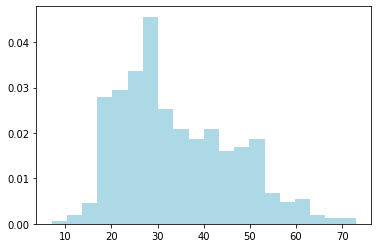

In [37]:
# 获取用户年龄RDD，并将其落地到驱动程序
ages = user_fields.map(lambda x: int(x[1])).collect()  # 获取一个list

# 绘制用户年龄直方图
# ages: 指定要绘制直方图的数据；  bins: 指定直方图条形的个数； density:是否将直方图的频数转换成频率? 没懂；
hist(ages, bins=20, color='lightblue', density=True)

count_by_occupation: [('other', 105), ('executive', 32), ('administrator', 79), ('student', 196), ('educator', 95), ('programmer', 66), ('homemaker', 7), ('artist', 28), ('engineer', 67), ('none', 9), ('retired', 14), ('doctor', 7), ('technician', 27), ('writer', 45), ('lawyer', 12), ('scientist', 31), ('entertainment', 18), ('librarian', 51), ('marketing', 26), ('healthcare', 16), ('salesman', 12)]
['other' 'executive' 'administrator' 'student' 'educator' 'programmer'
 'homemaker' 'artist' 'engineer' 'none' 'retired' 'doctor' 'technician'
 'writer' 'lawyer' 'scientist' 'entertainment' 'librarian' 'marketing'
 'healthcare' 'salesman']
[105  32  79 196  95  66   7  28  67   9  14   7  27  45  12  31  18  51
  26  16  12]
['doctor' 'homemaker' 'none' 'salesman' 'lawyer' 'retired' 'healthcare'
 'entertainment' 'marketing' 'technician' 'artist' 'scientist' 'executive'
 'writer' 'librarian' 'programmer' 'engineer' 'administrator' 'educator'
 'other' 'student']
[ 0.5  1.5  2.5  3.5  4.5  5.5

<BarContainer object of 21 artists>

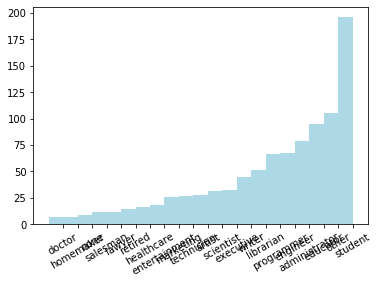

In [21]:
# 并行统计各职业人数的个数，返回职业统计RDD后落地
count_by_occupation = user_fields.map(lambda fields: (fields[3], 1)).reduceByKey(lambda x, y: x + y).collect()

print("count_by_occupation: %s" % count_by_occupation)

# 生成x/y坐标轴
x_axis1 = np.array([c[0] for c in count_by_occupation])
y_axis1 = np.array([c[1] for c in count_by_occupation])
x_axis = x_axis1[np.argsort(y_axis1)] # 按照Y轴的升序，对x轴的标签进行排列
y_axis = y_axis1[np.argsort(y_axis1)]

print(x_axis1)
print(y_axis1)
print(x_axis)

# 生成x轴标签
pos = np.arange(len(x_axis))
width = 1.0
# 初始化一个画布
ax = plt.axes()
print("=======")
print(pos + (width / 2))
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)

# 绘制职业人数条状图
plt.xticks(rotation=30)
plt.bar(pos, y_axis, width, color='lightblue')

**reduceByKey:**
reduceByKey会寻找相同key的数据，当找到这样的两条记录时会对其value(分别记为x,y)做(x,y) => x+y的处理，即只保留求和之后的数据作为value。反复执行这个操作直至每个key只留下一条记录。

**np.array:**
Python中提供了list容器，可以当作数组使用。但列表中的元素可以是任何对象，因此列表中保存的是对象的指针，这样一来，为了保存一个简单的列表[1,2,3]。就需要三个指针和三个整数对象。对于数值运算来说，这种结构显然不够高效。
    Python虽然也提供了array模块，但其只支持一维数组，不支持多维数组(在TensorFlow里面偏向于矩阵理解)，也没有各种运算函数。因而不适合数值运算。NumPy的出现弥补了这些不足。
a = np.array([2,3,4])
b = np.array([2.0,3.0,4.0])
c = np.array([[1.0,2.0],[3.0,4.0]])
d = np.array([[1,2],[3,4]],dtype=complex) # 指定数据类型

**np.argsort:**
1.先定义一个array数据
1 import numpy as np
2 x=np.array([1,4,3,-1,6,9])

2.现在我们可以看看argsort()函数的具体功能是什么：
x.argsort()
输出定义为y=array([3,0,2,1,4,5])。
我们发现argsort()函数是将x中的元素从小到大排列，提取其对应的index(索引)，然后输出到y。例如：x[3]=-1最小，所以y[0]=3,x[5]=9最大，所以y[5]=5。

**np.arrange:**
>>> np.arange(1, 5)
array([1, 2, 3, 4])
>>>np.arange(1, 5, .5)
array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

In [24]:
count_by_occupation2 = user_fields.map(lambda fields: fields[3]).countByValue()
print(count_by_occupation2)

defaultdict(<class 'int'>, {'technician': 27, 'other': 105, 'writer': 45, 'executive': 32, 'administrator': 79, 'student': 196, 'lawyer': 12, 'educator': 95, 'scientist': 31, 'entertainment': 18, 'programmer': 66, 'librarian': 51, 'homemaker': 7, 'artist': 28, 'engineer': 67, 'marketing': 26, 'none': 9, 'healthcare': 16, 'retired': 14, 'salesman': 12, 'doctor': 7})


 countByValue是Spark提供的便捷函数，它会自动统计每个Key下面的Value个数，并以字典的格式返回。

**探索电影数据**

In [27]:
# 载入数据集
movie_data = sc.textFile("./ml-100k/u.item")
# 展示首行记录
print(movie_data.first())

1|Toy Story (1995)|01-Jan-1995||http://us.imdb.com/M/title-exact?Toy%20Story%20(1995)|0|0|0|1|1|1|0|0|0|0|0|0|0|0|0|0|0|0|0


影片id | 影片名 | 影片发行日期 | 影片链接 | (后面几列先不去管)

In [28]:
# 查看下有多少部电影吧：
num_movies = movie_data.count()
print(num_movies)

1682


In [33]:
# 过滤掉没有发行时间信息的记录：

# 输入影片的发行时间字段，若非法则返回1900
def convert_year(x):
    try:
        return int(x[-4:])
    except:
        return 1900
 
# 以' | '切分每列，返回影片RDD
movie_fields = movie_data.map(lambda lines: lines.split("|"))
print(movie_fields)

# 生成新的影片发行年份RDD，并将空/异常的年份置为1900，
years = movie_fields.map(lambda fields: fields[2]).map(lambda x: convert_year(x))

# 过滤掉影片发行年份RDD中空/异常的记录
years_filtered = years.filter(lambda x: x != 1900)

PythonRDD[65] at RDD at PythonRDD.scala:53


[219, 355, 214, 5, 4, 126, 5, 13, 24, 37, 22, 4, 286, 12, 3, 3, 3, 7, 5, 6, 4, 7, 7, 11, 4, 9, 13, 15, 15, 8, 8, 7, 2, 8, 5, 8, 5, 6, 65, 8, 7, 2, 5, 5, 2, 4, 6, 9, 4, 5, 4, 4, 2, 2, 5, 5, 3, 4, 4, 3, 4, 5, 2, 4, 1, 3, 1, 1, 5, 1, 1]
71


(array([0.11581921, 0.04237288, 0.01694915, 0.        , 0.00564972,
        0.        , 0.        , 0.00282486, 0.        , 0.        ,
        0.        , 0.        , 0.00282486, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00282486, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00282486, 0.00282486, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00282486, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00282486]),
 array([  1.        ,   5.

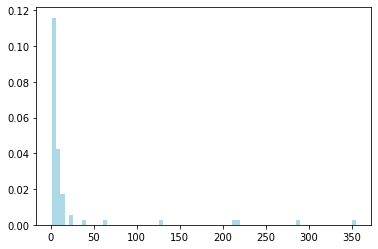

In [52]:
#统计影片的年龄分布：

# 生成影片年龄RDD，然后统计不同年龄的影片数并落地
movie_ages = years_filtered.map(lambda yr: 1998-yr).countByValue()

# 获得影片数
values = list(movie_ages.values())
print(values)

# 获得年龄
bins = list(movie_ages.keys())
a = len(bins)
print(a)

# 绘制电影年龄分布图
hist(values, bins=a, color='lightblue', density=True)

**探索评级数据**

In [53]:
# 载入数据集
rating_data_raw = sc.textFile("./ml-100k/u.data")
# 展示首行记录
print(rating_data_raw.first())

196	242	3	881250949


u.data 其中各列数据分别为：
用户id | 影片id | 评分值 | 时间戳(timestamp格式)

In [58]:
num_ratings = rating_data_raw .count()
print(num_ratings) #先看看有多少评分记录吧

100000


In [60]:
# 获取评分RDD
rating_data = rating_data_raw.map(lambda line: line.split("\t"))
ratings = rating_data.map(lambda fields: int(fields[2]))
# 计算最大/最小评分
max_rating = ratings.reduce(lambda x, y: max(x, y))
min_rating = ratings.reduce(lambda x, y: min(x, y))
# 计算平均/中位评分
mean_rating = ratings.reduce(lambda x, y: x + y) / float(num_ratings)
median_rating = np.median(ratings.collect())
# 计算每个观众/每部电影平均打分/被打分次数
ratings_per_user = num_ratings / num_users
ratings_per_movie = num_ratings / num_movies
# 输出结果
print("最低评分: %d" % min_rating)
print("最高评分: %d" % max_rating)
print("平均评分: %2.2f" % mean_rating)
print("中位评分: %d" % median_rating)
print("平均每个用户打分(次数): %2.2f" % ratings_per_user)
print("平均每部电影评分(次数): %2.2f" % ratings_per_movie)

最低评分: 1
最高评分: 5
平均评分: 3.53
中位评分: 4
平均每个用户打分(次数): 106.04
平均每部电影评分(次数): 59.45


In [61]:
# Spark有个挺实用的统计函数stats可直接获取常用的统计信息，类似R语言的summary函数
ratings.stats()

(count: 100000, mean: 3.5298600000000024, stdev: 1.125667970762251, max: 5.0, min: 1.0)

defaultdict(<class 'int'>, {3: 27145, 1: 6110, 2: 11370, 4: 34174, 5: 21201})
[3 1 2 4 5]
[27145.  6110. 11370. 34174. 21201.]


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text xticklabel objects>)

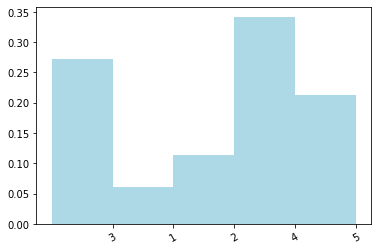

In [116]:
#统计评分分布
# 生成评分统计RDD，并落地
count_by_rating = ratings.countByValue()
print(count_by_rating)
# 生成x/y坐标轴
x_axis = np.array(list(count_by_rating.keys()))
print(x_axis)
y_axis = np.array([float(c) for c in count_by_rating.values()])
print(y_axis)
# 对人数做标准化，获取各评分人群的占比
y_axis_normed = y_axis / y_axis.sum()
 
# 生成x轴标签
pos = np.arange(len(x_axis))
width = 1.0
ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(x_axis)
 
# 绘制评分分布柱状图
plt.bar(pos, y_axis_normed, width, color='lightblue')

plt.xticks(rotation=30)

#这个柱状图要按序排列要用到argsort

In [103]:
# 统计不同用户的评分次数
# 首先将数据以用户id为Key分发到各个节点
user_ratings_grouped = rating_data.map(lambda fields: (int(fields[0]), int(fields[2]))).groupByKey()
# print(user_ratings_grouped.collect())
# 结果：[(196, <pyspark.resultiterable.ResultIterable object at 0x7f57d83a9978>), (186, <pyspark.resultiterable.ResultIterable object at 0x7f57d83a9908>)......

# 然后统计每个节点元素的个数，也即每个用户的评论次数
user_ratings_byuser = user_ratings_grouped.map(lambda f: (f[0], len(f[1])))

# 输出前5条记录
user_ratings_byuser.take(5)

[(196, 39), (186, 92), (22, 128), (244, 238), (166, 20)]